In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import string
import nltk
import numpy as np
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jencircj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/jencircj/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/jencircj/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/jencircj/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/jencircj/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/jencircj/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/jencircj/nltk_data...
[nltk_data]    |   Package movie_review

True

In [3]:
review_df=pd.read_csv("review.part.00.csv",engine ='python', error_bad_lines = False)

In [4]:
review_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
1,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
2,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
3,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
4,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0


In [5]:
review_df.drop([0], axis=0, inplace=True)

In [6]:
review_df.info(verbose = True, null_counts = True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 296230 entries, 1 to 296230
Data columns (total 9 columns):
review_id      296230 non-null object
user_id        296230 non-null object
business_id    296230 non-null object
stars          296230 non-null object
date           296230 non-null object
text           296230 non-null object
useful         296230 non-null object
funny          296230 non-null object
cool           296230 non-null object
dtypes: object(9)
memory usage: 22.6+ MB


In [7]:
review_df['text'][1]


"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [8]:
review_df=review_df.drop(['business_id','review_id','user_id'],axis=1)
review_df=review_df.rename(columns={'stars':'Stars','text':'Text','cool':'Cool','useful':'Useful','funny':'Funny'})

In [9]:
review_df['Text_length']=review_df['Text'].apply(len)
review_df.head()

,Stars,date,Text,Useful,Funny,Cool,Text_length
1,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,213
2,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,502
3,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,373
4,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,523
5,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,231


In [10]:
review_df.describe()

,Text_length
count,296230.00000
mean,616.83927
std,577.62134
min,1.00000
25%,243.00000
50%,437.00000
75%,787.00000
max,5035.00000


In [11]:
review_df[['Useful','Funny','Cool']]=review_df[['Useful','Funny','Cool']].apply(pd.to_numeric,errors='coerce',axis=1)

In [12]:
review_df.describe()

,Useful,Funny,Cool,Text_length
count,296230.000000,296230.000000,296230.000000,296230.00000
mean,1.325480,0.461445,0.543092,616.83927
std,5.316419,2.791416,2.854969,577.62134
min,0.000000,0.000000,0.000000,1.00000
25%,0.000000,0.000000,0.000000,243.00000
50%,0.000000,0.000000,0.000000,437.00000
75%,2.000000,0.000000,1.000000,787.00000
max,1456.000000,589.000000,245.000000,5035.00000


In [13]:
review_df[['Stars']]=review_df[['Stars']].apply(pd.to_numeric,errors='coerce',axis=1)

In [14]:
review_df.describe()

,Stars,Useful,Funny,Cool,Text_length
count,296230.000000,296230.000000,296230.000000,296230.000000,296230.00000
mean,3.741515,1.325480,0.461445,0.543092,616.83927
std,1.430526,5.316419,2.791416,2.854969,577.62134
min,1.000000,0.000000,0.000000,0.000000,1.00000
25%,3.000000,0.000000,0.000000,0.000000,243.00000
50%,4.000000,0.000000,0.000000,0.000000,437.00000
75%,5.000000,2.000000,0.000000,1.000000,787.00000
max,5.000000,1456.000000,589.000000,245.000000,5035.00000


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

Text(0, 0.5, 'Count')

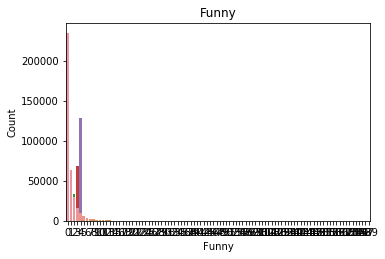

In [15]:
fig=plt.figure(figsize=(12,8))
axes1=plt.subplot(2,2,1)
axes1=sns.countplot(x='Stars',data=review_df)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes1=plt.subplot(2,2,1)
axes1=sns.countplot(x='Cool',data=review_df)
axes1.set_title('Cool')
axes1.set_ylabel('Count')

axes1=plt.subplot(2,2,1)
axes1=sns.countplot(x='Useful',data=review_df)
axes1.set_title('Useful')
axes1.set_ylabel('Count')

axes1=plt.subplot(2,2,1)
axes1=sns.countplot(x='Funny',data=review_df)
axes1.set_title('Funny')
axes1.set_ylabel('Count')


In [16]:
yelp_text=review_df[['Stars','Text']]

In [17]:
yelp_text.head()

,Stars,Text
1,5,Super simple place but amazing nonetheless. It...
2,5,Small unassuming place that changes their menu...
3,5,Lester's is located in a beautiful neighborhoo...
4,4,Love coming here. Yes the place always needs t...
5,4,Had their chocolate almond croissant and it wa...


In [18]:
def remove_punc_Stopword(text):
    remove_punc=[word for word in text if word not in string.punctuation]
    remove_punc=''.join(remove_punc)
    return[word.lower() for word in remove_punc.split() if word.lower()not in stopwords.words('english')]

In [19]:
yelp_text_allstars=yelp_text.head(150).copy()
yelp_text_allstars['Text']=yelp_text_allstars['Text'].apply(remove_punc_Stopword)
yelp_text_allstars.count()

Stars    150
Text     150
dtype: int64

In [20]:
yelp_text_allstars.head()

,Stars,Text
1,5,"[super, simple, place, amazing, nonetheless, a..."
2,5,"[small, unassuming, place, changes, menu, ever..."
3,5,"[lesters, located, beautiful, neighborhood, si..."
4,4,"[love, coming, yes, place, always, needs, floo..."
5,4,"[chocolate, almond, croissant, amazing, light,..."


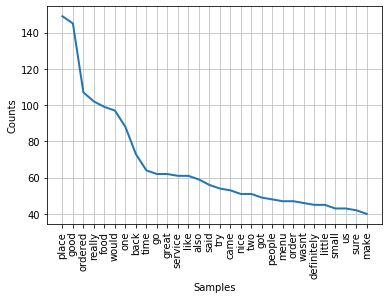

In [21]:
words_split=[]
for i in range(1,150):
    for word in yelp_text_allstars['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30,cumulative=False)